In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
ds = load_dataset("beanham/spatial_join_dataset")
test=ds['test']
val=ds['val']
train=ds['train']
train_pd=train.to_pandas()

### Degrees

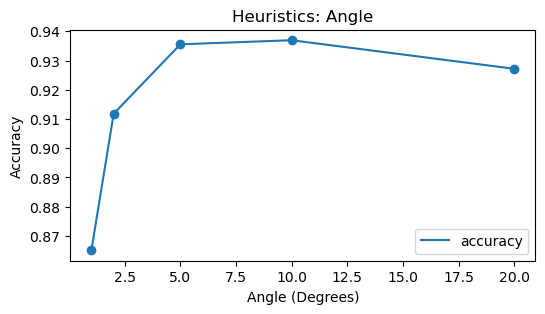

In [12]:
metrics=[1,2,5,10,20]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Angle')
plt.ylabel('Accuracy')
plt.xlabel('Angle (Degrees)')
#plt.plot(metrics,f1,label='f1')
#plt.scatter(metrics, f1)
#plt.vlines(x=metrics[np.argmax(accuracy)], ymin=np.min(accuracy), ymax=np.max(accuracy)+0.02, color='blue', linestyles='dashed')
#plt.vlines(x=metrics[np.argmax(accuracy)], ymin=np.min(accuracy), ymax=np.max(accuracy)+0.02, color='blue', linestyles='dashed')
plt.legend()
pass    

### Distance

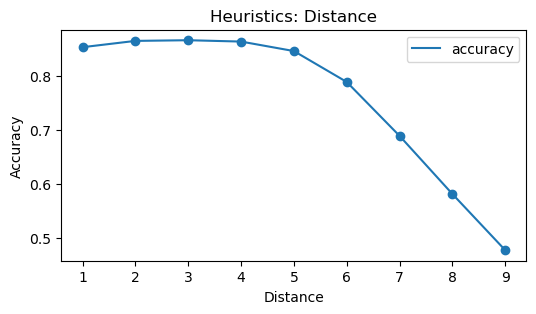

In [13]:
metrics=[1,2,3,4,5,6,7,8,9]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

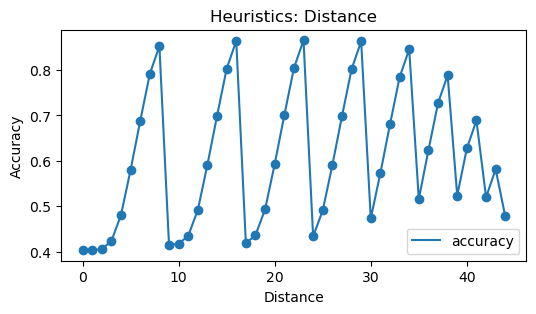

In [14]:
metrics=[1,2,3,4,5,6,7,8,9,10]
combs=list(product(metrics, metrics))
combs=[(lower, upper) for lower, upper in combs if upper>lower]
accuracy=[]
for lower,upper in combs:
    pred=( (np.array(train['euc_dist'])>=lower) & (np.array(train['euc_dist'])<upper) )
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(range(len(combs)),accuracy,label='accuracy')
plt.scatter(range(len(combs)), accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

### Area

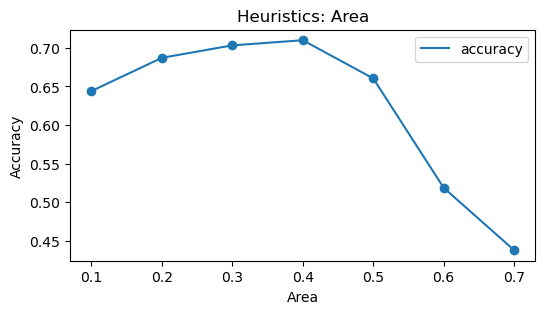

In [15]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

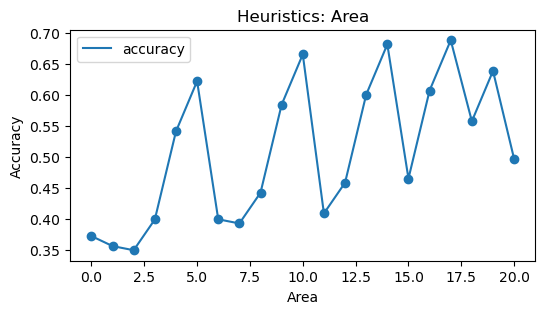

In [19]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
combs=list(product(metrics, metrics))
combs=[(lower, upper) for lower, upper in combs if upper>lower]
accuracy=[]
for lower,upper in combs:
    pred=( (np.array(train['max_area'])>=lower) & (np.array(train['max_area'])<upper) )
    accuracy.append(accuracy_score(train_gt, pred))    
plt.figure(figsize=(6,3))
plt.plot(range(len(combs)),accuracy,label='accuracy')
plt.scatter(range(len(combs)), accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    